In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import warnings
import sys
import time
warnings.filterwarnings('ignore')

from tqdm import tqdm
from pathlib import Path
from collections import Counter, defaultdict
from PIL import Image

In [2]:
try:                                                                                                 
    import google.colab                                                                              
    from google.colab import drive                                                                   
    drive.mount('/content/drive', force_remount=True)                                               
    PROJECT_ROOT = Path('/content/drive/Othercomputers/내 Mac/multiModal_anomaly_report') # 본인 경로 수정: Mac/Window
except ImportError:                                                                                  
    PROJECT_ROOT = Path.cwd().parents[1]

os.chdir(PROJECT_ROOT) # 현재 경로 수정
print(f"Current working directory: {os.getcwd()}") 

Current working directory: /Users/mungughyeon/Documents/Bootcamp/Likelion/multiModal_anomaly_report


In [3]:
# TODO: PATH 설정

# dataset path
DATA_ROOT = PROJECT_ROOT / "dataset" / "MMAD"
DOMAIN_JSON = DATA_ROOT / "domain_knowledge.json"
MMAD_JSON = DATA_ROOT / "mmad.json"
META_CSV = DATA_ROOT / "metadata.csv"

# config.yaml path
CONFIG_ROOT = PROJECT_ROOT / "configs"
RUNTIME_CONFIG_ROOT = CONFIG_ROOT / "runtime.yaml"
EVAL_CONFIG_ROOT = CONFIG_ROOT / "eval.yaml"

# check (선택사항)
# print(f"Project Root: {PROJECT_ROOT}")
# print(f"Data Root: {DATA_ROOT}")
# print(f"Config Root: {CONFIG_ROOT}")

In [4]:
from src.utils import load_config, load_json, load_csv

# TODO: runtime_config.yaml 확장/수정
runtime_config = load_config(RUNTIME_CONFIG_ROOT)
domain_json = load_json(DOMAIN_JSON)
mmad_json = load_json(MMAD_JSON)
meta_csv = load_csv(META_CSV)

In [ ]:
from anomalib.data import MVTecAD
from anomalib.models import Patchcore
from anomalib.engine import Engine

# tqdm bar off
os.environ["TQDM_DISABLE"] = "1"
CKPT_DIR = PROJECT_ROOT / "output" / "Patchcore" / "MVTecAD"

categories = [                                                                                       
    "bottle", "cable", "capsule", "carpet", "grid",                                                  
    "hazelnut", "leather", "metal_nut", "pill", "screw",                                             
    "tile", "toothbrush", "transistor", "wood", "zipper"                                             
]                         

# Train the model
for i, category in enumerate(categories, 1):                                                         
    print(f"\n[{i}/{len(categories)}] Training: {category}...")                                      
                                                                                                    
    start = time.time()                                                                              
                                                                                                    
    datamodule = MVTecAD(                                                                            
        root=DATA_ROOT / "MVTec-AD",                                                                 
        category=category                                                                            
    )                                                                                                
                                                                                                    
    model = Patchcore()                                                                              
    engine = Engine(                                                                                 
        logger=False,                                                                                
        enable_progress_bar=False,                                                                   
        accelerator="cpu",                                                                           
        devices=1,                                                                                   
        default_root_dir=CKPT_DIR / category                                                         
    )                                                                                                
                                                                                                    
    engine.fit(datamodule=datamodule, model=model);                                                  
                                                                                                    
    elapsed = time.time() - start                                                                    
    print(f"✓ [{i}/{len(categories)}] {category} 완료 ({elapsed:.1f}s)")                            


[1/15] Training: bottle...


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

Selecting Coreset Indices.: 100%|██████████| 21401/21401 [03:57<00:00, 89.97it/s] 
`Trainer.fit` stopped: `max_epochs=1` reached.


✓ [1/15] bottle 완료 (380.7s)

[2/15] Training: cable...


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

In [ ]:
# # tqdm bar on
# os.environ.pop("TQDM_DISABLE", None)

all_predictions = {}                                             
                                                                                                    
for i, category in enumerate(tqdm(categories, desc="Inference"), 1):                                 
    tqdm.write(f"\n[{i}/{len(categories)}] Inference: {category}")                                   
                                                                                                                                                                                             
    # checkpoint path                                                              
    ckpt_path = CKPT_DIR / category / "v0/weights/lightning/model.ckpt"                              
                                                                                                                                                                                                  
    # Inference                                                                                      
    predictions = engine.predict(                                                                    
        datamodule=datamodule,                                                                       
        model=model,                                                                                 
        ckpt_path=ckpt_path,                                                                         
    )                                                                                                
                                         
    all_predictions[category] = predictions                                                          
    tqdm.write(f"✓ [{i}/{len(categories)}] {category} 완료")                 

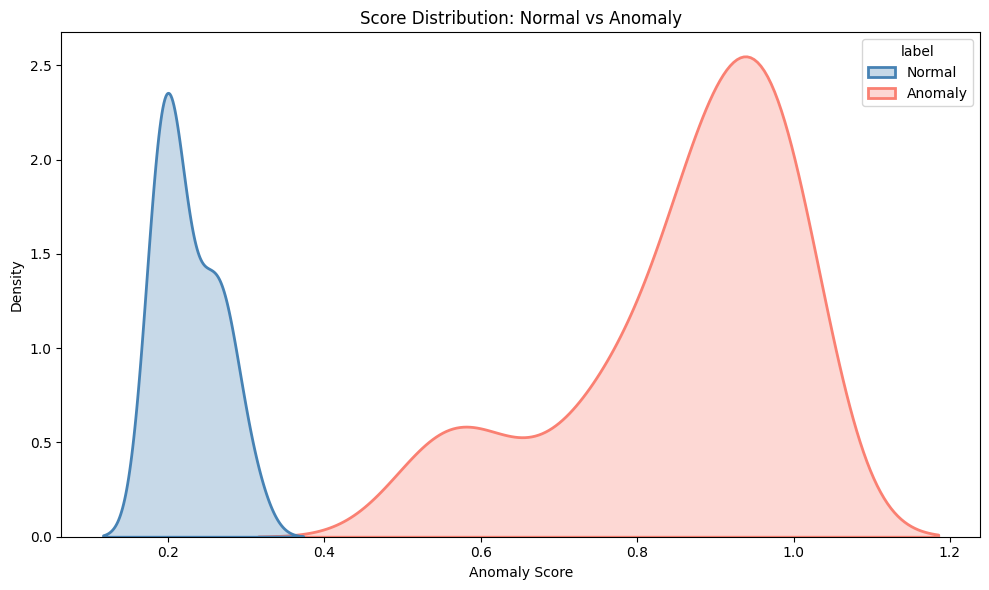

<Axes: title={'center': 'Score Distribution: Normal vs Anomaly'}, xlabel='Anomaly Score', ylabel='Density'>

In [7]:
from src.visual.plot import kde_plot

y_true_list = []                                                                                     
y_score_list = []                                                                                    
                                                                                                    
for p in predictions:                                                                                
    gt = p.gt_label.cpu().numpy() if hasattr(p.gt_label, 'cpu') else p.gt_label                      
    score = p.pred_score.cpu().numpy() if hasattr(p.pred_score, 'cpu') else p.pred_score             
    y_true_list.append(gt)                                                                           
    y_score_list.append(score)                                                                       
                                                                                                    
y_true = np.concatenate(y_true_list)                                                                 
y_score = np.concatenate(y_score_list)

normal_scores = y_score[y_true == 0]                                                               
anomaly_scores = y_score[y_true == 1]

scores_df = pd.DataFrame({                                                                           
    'score': np.concatenate([normal_scores, anomaly_scores]),                                        
    'label': ['Normal'] * len(normal_scores) + ['Anomaly'] * len(anomaly_scores)                     
})

kde_plot(                                                                                            
    scores_df,                                                                                       
    col='score',                                                                                     
    hue='label',                                                                                     
    palette=['steelblue', 'salmon'],                                                                 
    title='Score Distribution: Normal vs Anomaly',                                                   
    xlabel='Anomaly Score'                                                                           
)

In [ ]:
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

results = []                                                                                         
                                                                                                    
for category, preds in all_predictions.items():                                                      
    # batch → image 단위로 flatten                                                                   
    y_true = np.concatenate([p.gt_label.cpu().numpy() for p in preds])                               
    y_score = np.concatenate([p.pred_score.cpu().numpy() for p in preds])                            
    y_pred = (y_score >= 0.5).astype(int)                                                            
                                                                                                    
    metrics = {                                                                                      
        "Category": category,                                                                        
        "AUROC": round(roc_auc_score(y_true, y_score), 4),                                            
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),                                                  
        "Precision": round(precision_score(y_true, y_pred, zero_division=0), 4),                              
        "Recall": round(recall_score(y_true, y_pred, zero_division=0), 4),
        "F1": round(f1_score(y_true, y_pred, zero_division=0), 4),                                             
        "N_samples": len(y_true),                                                                    
    }                                                                                                
    results.append(metrics)

metrics_df = pd.DataFrame(results).set_index("Category")
metrics_df['Average'] = metrics_df.mean().round(4)
metrics_df

,AUROC,Accuracy,Precision,Recall,F1
bottle,1.0,1.0,1.0,1.0,1.0


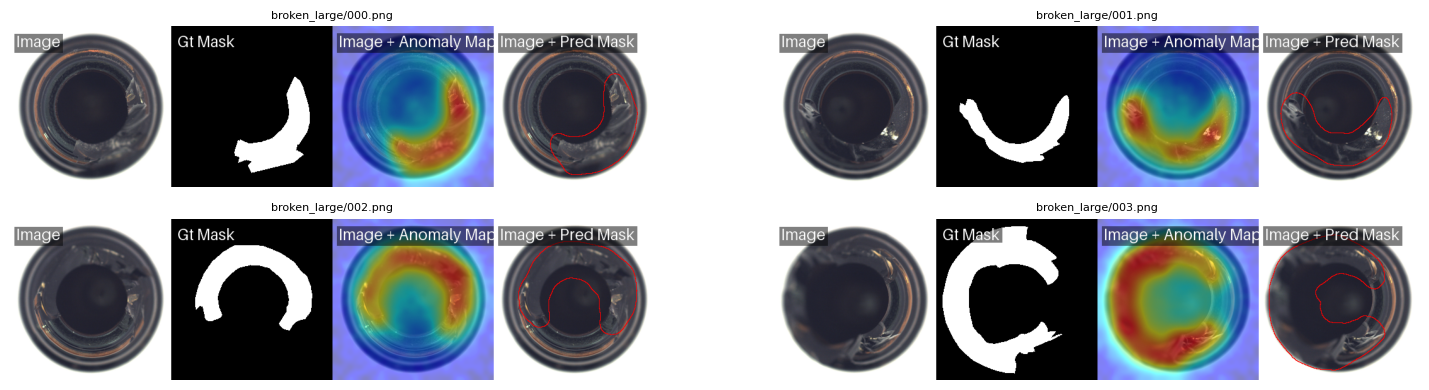

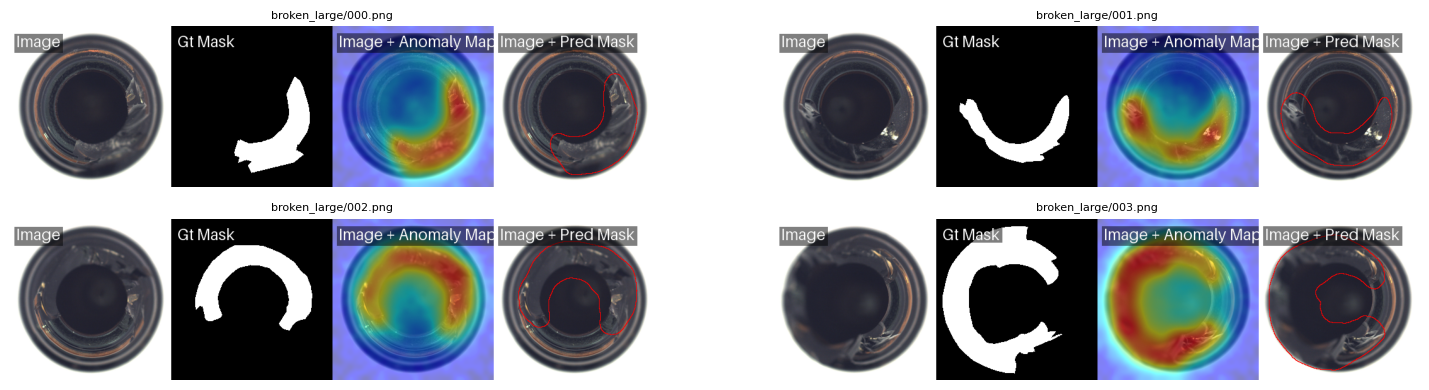

In [9]:
from src.visual.plot import anomaly_grid_from_dir

RESULT_DIR = PROJECT_ROOT / "results/Patchcore/MVTecAD/bottle/v0/images"
anomaly_grid_from_dir(RESULT_DIR, n_samples=4, n_cols=2)